<h1> QCA getting started notebook </h1>
<h4> First, install requirements into a virtual environment </h4>

In [4]:
from qutip import *
import matplotlib as plt
import qiskit as q
from qiskit.tools.monitor import job_monitor
# plt.style.use("dark_background")

## Getting Started with Qutip
The documentation for QuTip version 4.5 (currently the latest version) is available here: http://qutip.org/docs/latest/index.html

### The Quantum object class (Qobj)
A quantum object is a data structure that represents a the properties of quantum states and operators, it is represented in Qutip using the `Qobj` class. `Qobj` can be initialised using a matrix as shown.

In [5]:
object1 = Qobj([[1],[2],[3],[4],[5]])
object1

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]

In [6]:
k2 = basis(5, 3)
k2

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]

In [12]:
k2.isherm

False

In [13]:
k2.data

<5x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

#### Functions operating on quantum objects
QuTip has several built-in common linear algebra type operations that one can perfrom on states or operators. For example, the Hermitian adjoint can be performed by calling the `dag` function as below. See page 18 of the Users Guide ([or this link](http://qutip.org/docs/latest/guide/guide-basics.html#functions-operating-on-qobj-class)) for a list of all functions operating on a quantum object.

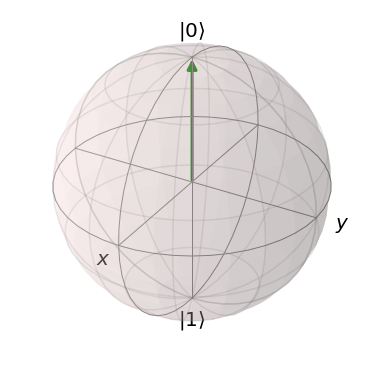

In [11]:
b = Bloch()
up = basis(2,0)
b.add_states(up)
b.show()

<H2>Running a circuit on an Aer simulator</H2>

<h3>Creating a circuit</h3>

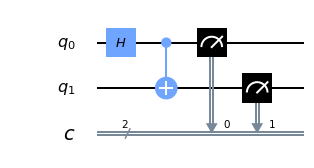

In [33]:
# Create a Quantum Circuit acting on the q register
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw(output="mpl")

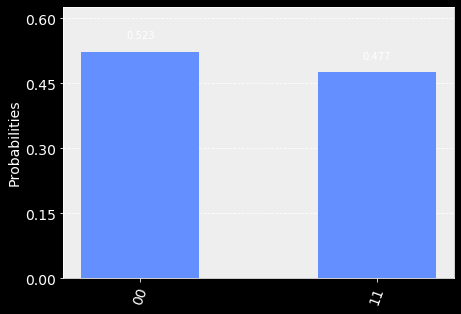

In [40]:
simulator = q.Aer.get_backend('qasm_simulator')
job = q.execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
q.visualization.plot_histogram(counts)

<h2> Running on an IBMQ computer </h2>

### Adding an account key
Go to https://quantum-computing.ibm.com and make an account, follow the steps and retriver your IBMQ experience key, once you have replace the key string below your own key.

In [6]:
key = "2dcdaa32c49ad246c204abe6c814e414786b268d997eb1bbc625a39c3cd9aaeade5080d57a360d0b2680458a8a38c9f455c9a931b9cb4849592633665c2cc2be"
q.IBMQ.save_account(key)

/Users/labrum/Library/Python/3.7/lib/python/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


Once your account is saved to the notebook, you are able to load the account and select the IBMQ backends as a provider.

In [ ]:
q.IBMQ.load_account()
provider = q.IBMQ.get_provider('ibm-q')

Often the machines can have very large queues, this helper function finds a machine with the fewest pending jobs which is capable of running our circuit.

In [41]:
def soonest_backend(nqbits, print_backends=False):
    status = []
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = 0
        if print_backends:
            print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
        status.append((backend.name(), qubit_count, backend.status().pending_jobs))
    
    min_queue = min([comp[2] for comp in status if (int(comp[1]) >= nqbits)])
    for cp in status:
        if cp[2] == min_queue:
            return cp[0]
        
machine = soonest_backend(2) 

In [ ]:

backend = provider.get_backend(machine)
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)

q.visualization.plot_histogram([counts], legend=[machine])